In [1]:
pwd

'/home/work/SCOUTERv2/scouter'

## setting

In [2]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 1.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 15.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 31.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.8/38.8 MB 26.9 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 52.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━

In [3]:
pip install --upgrade scikit-image==0.18.3

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip uninstall -y numpy matplotlib scipy scikit-image PyWavelets


Found existing installation: numpy 1.21.6
Uninstalling numpy-1.21.6:
  Successfully uninstalled numpy-1.21.6
Found existing installation: matplotlib 3.3.1
Uninstalling matplotlib-3.3.1:
  Successfully uninstalled matplotlib-3.3.1
Found existing installation: scipy 1.7.3
Uninstalling scipy-1.7.3:
  Successfully uninstalled scipy-1.7.3
Found existing installation: scikit-image 0.18.3
Uninstalling scikit-image-0.18.3:
  Successfully uninstalled scikit-image-0.18.3
Found existing installation: PyWavelets 1.4.1
Uninstalling PyWavelets-1.4.1:
  Successfully uninstalled PyWavelets-1.4.1


In [5]:
!pip install --no-cache-dir \
    numpy==1.23.5 \
    matplotlib==3.6.3 \
    scipy==1.9.3 \
    scikit-image==0.19.3 \
    PyWavelets==1.4.1

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 53.4 MB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 105.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 113.9 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.16.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
fastai 2.7.13 requires pillow>=9.0.0, but you have pillow 7.2.0 which is incompatible.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have job

In [6]:
!pip cache purge

Files removed: 71


In [7]:
!pip uninstall torch torchvision torchaudio -y

!pip install torch==2.1.0+cu118 torchvision==0.16.0+cu118 torchaudio==2.1.0 --index-url https://download.pytorch.org/whl/cu118

Found existing installation: torch 1.11.0
Uninstalling torch-1.11.0:
  Successfully uninstalled torch-1.11.0
Found existing installation: torchvision 0.12.0
Uninstalling torchvision-0.12.0:
  Successfully uninstalled torchvision-0.12.0
Found existing installation: torchaudio 2.1.0+cu121
Uninstalling torchaudio-2.1.0+cu121:
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/lib/python3.10/shutil.py", line 816, in move
    os.rename(src, real_dst)
PermissionError: [Errno 13] Permission denied: '/usr/local/lib/python3.10/dist-packages/torchaudio-2.1.0+cu121.dist-info/' -> '/tmp/pip-uninstall-nkpq8_st'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/uninstall.py", line 105, in run
    uninstall_pathset = r

## fine-tuning

In [9]:
# baseline
!python train.py --dataset Blastocyst \
    --model resnest26d \
    --batch_size 16 \
    --epochs 30 \
    --num_classes 2 \
    --aug true \
    --lr 0.0005 \
    --vis false \
    --weight_decay 0.005 \
    --use_slot false \
    --channel 3 \
    --use_pre true \
    --freeze_layers 3 \
    --dataset_dir /home/work/SCOUTERv2/scouter/data/blastocyst/split

Not using distributed mode
Start training: epochs=30, batch_size=16, lr=0.0005
start train :0
100% 28/28 [00:08<00:00,  3.13it/s]
[Epoch 0] val_acc=0.547 val_auc=0.473 val_loss=5.567
✔ best.pth updated
train loss: [6.928]
val loss: [5.567]
train acc: [0.158]
val acc: [0.547]
train CE loss [0.0]
val CE loss [5.567]
train attention loss [0.0]
val attention loss [0.0]
start train :1
100% 28/28 [00:08<00:00,  3.21it/s]
[Epoch 1] val_acc=0.432 val_auc=0.491 val_loss=6.559
train loss: [6.928, 6.48]
val loss: [5.567, 6.559]
train acc: [0.158, 0.435]
val acc: [0.547, 0.432]
train CE loss [0.0, 0.0]
val CE loss [5.567, 6.559]
train attention loss [0.0, 0.0]
val attention loss [0.0, 0.0]
start train :2
100% 28/28 [00:08<00:00,  3.21it/s]
[Epoch 2] val_acc=0.537 val_auc=0.499 val_loss=6.559
train loss: [6.928, 6.48, 6.305]
val loss: [5.567, 6.559, 6.559]
train acc: [0.158, 0.435, 0.562]
val acc: [0.547, 0.432, 0.537]
train CE loss [0.0, 0.0, 0.0]
val CE loss [5.567, 6.559, 6.559]
train attention 

In [15]:
# slot-positive
!python train_slot.py \
  --dataset Blastocyst \
  --model resnest26d \
  --batch_size 16 \
  --epochs 30 \
  --num_classes 2 \
  --use_slot true \
  --use_pre false \
  --loss_status 1 \
  --slots_per_class 3 \
  --power 2 \
  --to_k_layer 1 \
  --lambda_value 1.5 \
  --vis false \
  --freeze_layers 1 \
  --resume /home/work/SCOUTERv2/scouter/saved_model/best5.pth \
  --dataset_dir /home/work/SCOUTERv2/scouter/data/blastocyst/split

Not using distributed mode
Resume from /home/work/SCOUTERv2/scouter/saved_model/best5.pth → backbone만 로드, 학습은 처음부터 이어서 진행합니다.
Start training: epochs=30, batch_size=16, lr=0.0001
start train :0
100% 28/28 [00:09<00:00,  2.94it/s]
[Epoch 0] val_acc=0.589 val_auc=0.720 val_loss=4.223
✔ best.pth updated
train loss: [0.787]
val loss: [4.223]
train acc: [0.558]
val acc: [0.589]
train CE loss [0.551]
val CE loss [4.161]
train attention loss [0.157]
val attention loss [0.042]
start train :1
100% 28/28 [00:08<00:00,  3.19it/s]
[Epoch 1] val_acc=0.589 val_auc=0.616 val_loss=0.948
train loss: [0.787, 0.56]
val loss: [4.223, 0.948]
train acc: [0.558, 0.806]
val acc: [0.589, 0.589]
train CE loss [0.551, 0.478]
val CE loss [4.161, 0.885]
train attention loss [0.157, 0.055]
val attention loss [0.042, 0.042]
start train :2
100% 28/28 [00:08<00:00,  3.18it/s]
[Epoch 2] val_acc=0.568 val_auc=0.550 val_loss=0.940
train loss: [0.787, 0.56, 0.389]
val loss: [4.223, 0.948, 0.94]
train acc: [0.558, 0.806, 0.

In [1]:
# slot-negative
!python train_slot.py \
  --dataset Blastocyst \
  --model resnest26d \
  --batch_size 16 \
  --epochs 30 \
  --num_classes 2 \
  --use_slot true \
  --use_pre false \
  --loss_status -1 \
  --slots_per_class 1 \
  --power 2 \
  --to_k_layer 3 \
  --lambda_value 3.0 \
  --lr 0.0001 \
  --vis false \
  --freeze_layers 1 \
  --resume /home/work/SCOUTERv2/scouter/saved_model/best5.pth \
  --dataset_dir /home/work/SCOUTERv2/scouter/data/blastocyst/split

Not using distributed mode
Resume from /home/work/SCOUTERv2/scouter/saved_model/best5.pth → backbone만 로드, 학습은 처음부터 이어서 진행합니다.
Start training: epochs=30, batch_size=16, lr=0.0001
start train :0
100% 28/28 [00:09<00:00,  2.88it/s]
[Epoch 0] val_acc=0.674 val_auc=0.570 val_loss=1.655
✔ best.pth updated
train loss: [1.132]
val loss: [1.655]
train acc: [0.754]
val acc: [0.674]
train CE loss [0.583]
val CE loss [1.286]
train attention loss [0.183]
val attention loss [0.123]
start train :1
100% 28/28 [00:08<00:00,  3.18it/s]
[Epoch 1] val_acc=0.568 val_auc=0.584 val_loss=1.921
train loss: [1.132, 0.686]
val loss: [1.655, 1.921]
train acc: [0.754, 0.842]
val acc: [0.674, 0.568]
train CE loss [0.583, 0.377]
val CE loss [1.286, 1.726]
train attention loss [0.183, 0.103]
val attention loss [0.123, 0.065]
start train :2
100% 28/28 [00:08<00:00,  3.20it/s]
[Epoch 2] val_acc=0.621 val_auc=0.647 val_loss=1.124
train loss: [1.132, 0.686, 0.46]
val loss: [1.655, 1.921, 1.124]
train acc: [0.754, 0.842, 

### 시각화

In [3]:
!python test.py \
  --dataset Blastocyst \
  --model resnest26d \
  --batch_size 16 \
  --num_classes 2 \
  --use_slot true \
  --use_pre false \
  --loss_status 1 \
  --slots_per_class 1 \
  --power 2 \
  --to_k_layer 1 \
  --lambda_value 1.5 \
  --vis true \
  --freeze_layers 1 \
  --dataset_dir /home/work/SCOUTERv2/scouter/data/blastocyst/split \
  --output_dir saved_model/best3p-slot.pth

Ground-truth label:	 1
Checkpoint keys: ['model', 'optimizer', 'lr_scheduler', 'epoch', 'args', 'best_acc']
Raw logits: [-2.0683885  -0.13512045]
Predicted class: 1


In [4]:
!python test.py \
  --dataset Blastocyst \
  --model resnest26d \
  --batch_size 16 \
  --num_classes 2 \
  --use_slot true \
  --use_pre false \
  --loss_status -1 \
  --slots_per_class 1 \
  --power 2 \
  --to_k_layer 3 \
  --lambda_value 3.0 \
  --vis true \
  --freeze_layers 1 \
  --dataset_dir /home/work/SCOUTERv2/scouter/data/blastocyst/split \
  --output_dir saved_model/best5n-slot.pth

Ground-truth label:	 1
Checkpoint keys: ['model', 'optimizer', 'lr_scheduler', 'epoch', 'args', 'best_acc']
Raw logits: [-2.258872  -0.1103376]
Predicted class: 1


## 평가지표

In [9]:
!python eval_blasto.py \
  --dataset_dir /home/work/SCOUTERv2/scouter/data/blastocyst/split \
  --checkpoint  /home/work/SCOUTERv2/scouter/saved_model/best3p-slot.pth \
  --model resnest26d \
  --use_slot true \
  --loss_status 1 \
  --to_k_layer 1 \
  --lambda_value 1.5 \
  --freeze_layers 1 \
  --vis true \
  --auc --saliency

[Info] generating explanation images …
Predicting labels: 100% 1/1 [00:00<00:00,  6.02it/s]
Substrate: 100% 1/1 [00:00<00:00, 176.45it/s]
Inserting pixels: 100% 261/261 [00:04<00:00, 59.65it/s]
AUC: 0.6042893525947315
Predicting labels: 100% 1/1 [00:00<00:00, 70.17it/s]
Substrate: 100% 1/1 [00:00<00:00, 877.65it/s]
Deleting  pixels: 100% 261/261 [00:04<00:00, 58.05it/s]
AUC: 0.5481977279647253
Predicting labels: 100% 1/1 [00:00<00:00, 54.71it/s]
Substrate: 100% 1/1 [00:00<00:00, 339.45it/s]
Inserting pixels: 100% 261/261 [00:04<00:00, 58.84it/s]
AUC: 0.48264796394639864
Predicting labels: 100% 1/1 [00:00<00:00, 70.33it/s]
Substrate: 100% 1/1 [00:00<00:00, 1583.35it/s]
Deleting  pixels: 100% 261/261 [00:04<00:00, 59.57it/s]
AUC: 0.481679073191033
Predicting labels: 100% 1/1 [00:00<00:00, 52.94it/s]
Substrate: 100% 1/1 [00:00<00:00, 136.61it/s]
Inserting pixels: 100% 261/261 [00:04<00:00, 59.52it/s]
AUC: 0.35365271028399897
Predicting labels: 100% 1/1 [00:00<00:00, 67.02it/s]
Substrate: 

In [10]:
!python eval_blasto.py \
  --dataset_dir /home/work/SCOUTERv2/scouter/data/blastocyst/split \
  --checkpoint  /home/work/SCOUTERv2/scouter/saved_model/best5n-slot.pth \
  --model resnest26d \
  --use_slot true \
  --loss_status -1 \
  --to_k_layer 3 \
  --lambda_value 3.0 \
  --freeze_layers 1 \
  --vis true \
  --auc --saliency

[Info] generating explanation images …
Predicting labels: 100% 1/1 [00:00<00:00,  5.88it/s]
Substrate: 100% 1/1 [00:00<00:00, 122.19it/s]
Inserting pixels: 100% 261/261 [00:04<00:00, 58.06it/s]
AUC: 0.7431441300271008
Predicting labels: 100% 1/1 [00:00<00:00, 65.81it/s]
Substrate: 100% 1/1 [00:00<00:00, 850.08it/s]
Deleting  pixels: 100% 261/261 [00:04<00:00, 58.29it/s]
AUC: 0.6124524598938059
Predicting labels: 100% 1/1 [00:00<00:00, 67.95it/s]
Substrate: 100% 1/1 [00:00<00:00, 341.11it/s]
Inserting pixels: 100% 261/261 [00:04<00:00, 57.54it/s]
AUC: 0.7108251866168127
Predicting labels: 100% 1/1 [00:00<00:00, 66.30it/s]
Substrate: 100% 1/1 [00:00<00:00, 1825.99it/s]
Deleting  pixels: 100% 261/261 [00:04<00:00, 58.08it/s]
AUC: 0.609533343782935
Predicting labels: 100% 1/1 [00:00<00:00, 67.37it/s]
Substrate: 100% 1/1 [00:00<00:00, 345.89it/s]
Inserting pixels: 100% 261/261 [00:04<00:00, 52.71it/s]
AUC: 0.6362009194321357
Predicting labels: 100% 1/1 [00:00<00:00, 68.00it/s]
Substrate: 10

In [12]:
!python confusion_matrix_metrics.py \
  --dataset Blastocyst \
  --checkpoint /home/work/SCOUTERv2/scouter/saved_model/best3p-slot.pth \
  --dataset_dir /home/work/SCOUTERv2/scouter/data/blastocyst/split \
  --model resnest26d \
  --use_slot true \
  --loss_status 1 \
  --to_k_layer 1 \
  --lambda_value 1.5 \
  --slots_per_class 1 \
  --power 2 \
  --freeze_layers 1 \
  --output_dir saved_model

Loading checkpoint from /home/work/SCOUTERv2/scouter/saved_model/best3p-slot.pth
{'auc': 0.6852678571428571, 'accuracy': 0.796875, 'precision': 0.3333333333333333, 'recall': 0.625, 'f1': 0.43478260869565216, 'kappa': 0.3246753246753247}


In [13]:
!python confusion_matrix_metrics.py \
  --dataset Blastocyst \
  --checkpoint /home/work/SCOUTERv2/scouter/saved_model/best5n-slot.pth \
  --dataset_dir /home/work/SCOUTERv2/scouter/data/blastocyst/split \
  --model resnest26d \
  --use_slot true \
  --loss_status -1 \
  --to_k_layer 3 \
  --lambda_value 3.0 \
  --slots_per_class 1 \
  --power 2 \
  --freeze_layers 1 \
  --output_dir saved_model

Loading checkpoint from /home/work/SCOUTERv2/scouter/saved_model/best5n-slot.pth
{'auc': 0.7142857142857143, 'accuracy': 0.796875, 'precision': 0.2727272727272727, 'recall': 0.375, 'f1': 0.3157894736842105, 'kappa': 0.19999999999999996}


In [14]:
# baseline
!python confusion_matrix_metrics.py \
  --dataset Blastocyst \
  --checkpoint /home/work/SCOUTERv2/scouter/saved_model/best5.pth \
  --dataset_dir /home/work/SCOUTERv2/scouter/data/blastocyst/split \
  --model resnest26d \
  --freeze_layers 3 \
  --channel 3 \
  --use_slot false

Loading checkpoint from /home/work/SCOUTERv2/scouter/saved_model/best5.pth
{'auc': 0.7522321428571428, 'accuracy': 0.828125, 'precision': 0.36363636363636365, 'recall': 0.5, 'f1': 0.4210526315789474, 'kappa': 0.32307692307692304}


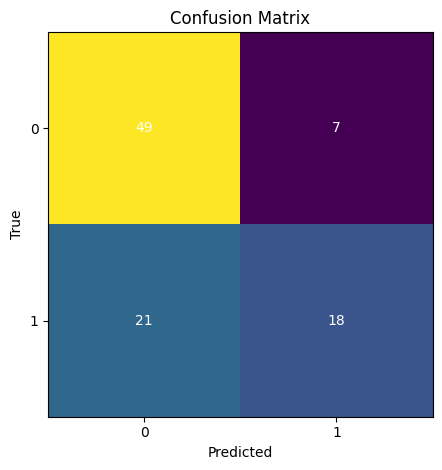

<Figure size 640x480 with 0 Axes>

In [13]:
%matplotlib inline
%run view_cm.py \
  --dataset Blastocyst \
  --dataset_dir /home/work/SCOUTERv2/scouter/data/blastocyst/split \
  --checkpoint /home/work/SCOUTERv2/scouter/saved_model/best5.pth

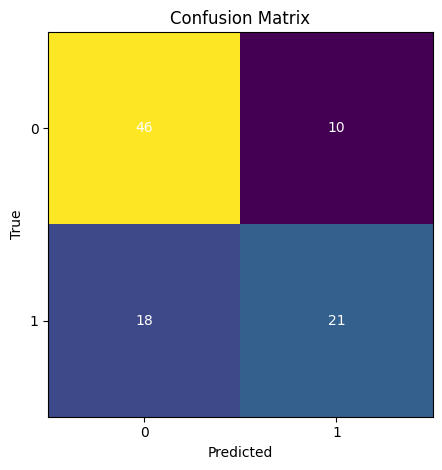

<Figure size 640x480 with 0 Axes>

In [14]:
%matplotlib inline
%run view_cm.py \
  --dataset Blastocyst \
  --dataset_dir /home/work/SCOUTERv2/scouter/data/blastocyst/split \
  --checkpoint /home/work/SCOUTERv2/scouter/saved_model/best3p-slot.pth

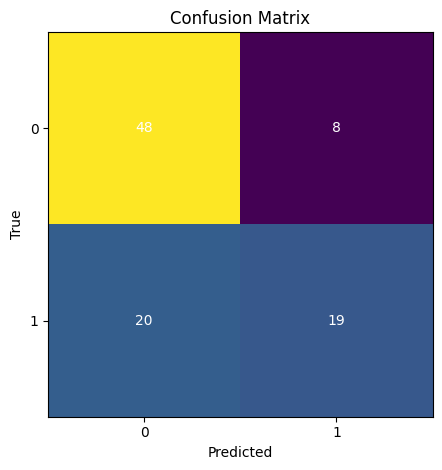

<Figure size 640x480 with 0 Axes>

In [15]:
%matplotlib inline
%run view_cm.py \
  --dataset Blastocyst \
  --dataset_dir /home/work/SCOUTERv2/scouter/data/blastocyst/split \
  --checkpoint /home/work/SCOUTERv2/scouter/saved_model/best5n-slot.pth

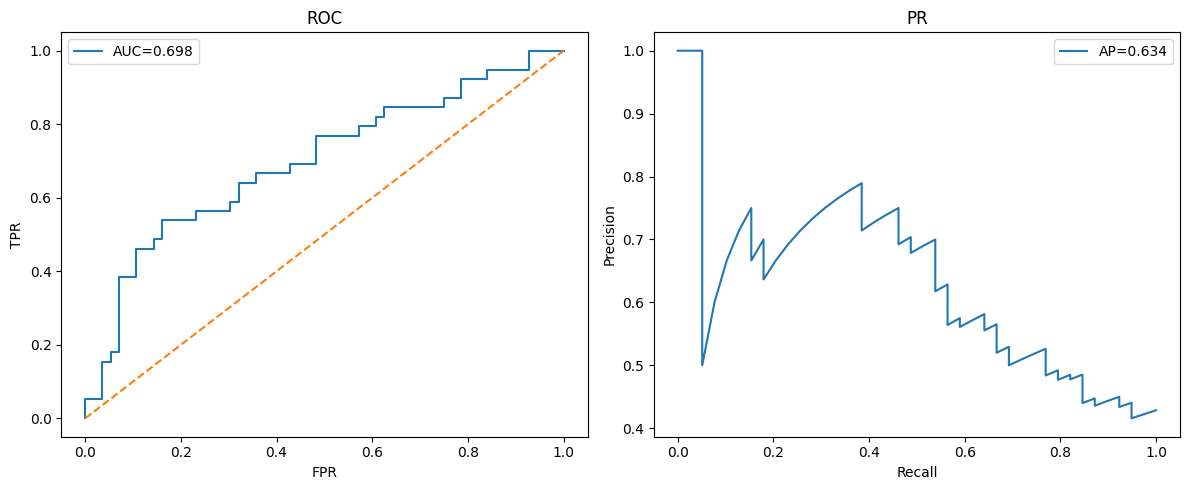

F1 최고 임계값: 0.001  →  F1=0.625


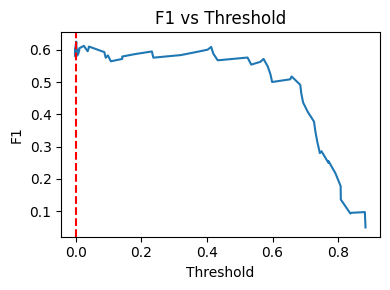

In [12]:
from dataset.ConText import ConText, MakeListImage
from torchvision import transforms
import torch, argparse, os

device = 'cuda' if torch.cuda.is_available() else 'cpu'
img_size = 260

args = argparse.Namespace(dataset='Blastocyst',
                          dataset_dir='/home/work/SCOUTERv2/scouter/data/blastocyst/split',
                          num_classes=2, img_size=img_size)

_, val_list = MakeListImage(args).get_data()
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])
val_dataset = ConText(val_list, transform=transform)
val_loader  = torch.utils.data.DataLoader(val_dataset, batch_size=16,
                                          shuffle=False, num_workers=1)

from sloter.slot_model import SlotModel
ckpt_path = '/home/work/SCOUTERv2/scouter/saved_model/best5n-slot.pth'  
ckpt      = torch.load(ckpt_path, map_location=device)

slot_args = ckpt['args']                      # 학습 시 하이퍼파라미터 그대로
slot_args.device = device
model = SlotModel(slot_args).to(device)
model.load_state_dict(ckpt['model'], strict=False)
model.eval()

# ----------------------------------
# ROC, PR, F1-threshold 그래프
# ----------------------------------
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, auc, average_precision_score
import numpy as np, matplotlib.pyplot as plt

probs, labels = [], []
with torch.no_grad():
    for batch in val_loader:
        x = batch['image'].to(device)
        y = batch['label'].cpu().numpy()
        out = model(x)
        p   = (out[0] if isinstance(out,(tuple,list)) else out).softmax(1)[:,1]
        probs.append(p.cpu().numpy()); labels.append(y)

probs  = np.concatenate(probs)
labels = np.concatenate(labels)

# ROC & PR 곡선
fpr, tpr, _  = roc_curve(labels, probs)
prec, rec, thr_pr = precision_recall_curve(labels, probs)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.plot(fpr,tpr,label=f"AUC={auc(fpr,tpr):.3f}")
plt.plot([0,1],[0,1],'--'); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC"); plt.legend()
plt.subplot(1,2,2); plt.plot(rec,prec,label=f"AP={average_precision_score(labels,probs):.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("PR"); plt.legend()
plt.tight_layout(); plt.show()

# F1 vs Threshold
f1s = [f1_score(labels, probs>=t) for t in thr_pr]
best_idx = np.argmax(f1s)
best_thr, best_f1 = thr_pr[best_idx], f1s[best_idx]
print(f"F1 최고 임계값: {best_thr:.3f}  →  F1={best_f1:.3f}")

plt.figure(figsize=(4,3))
plt.plot(thr_pr, f1s); plt.axvline(best_thr,c='r',ls='--')
plt.xlabel("Threshold"); plt.ylabel("F1"); plt.title("F1 vs Threshold")
plt.tight_layout(); plt.show()